# Importing necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

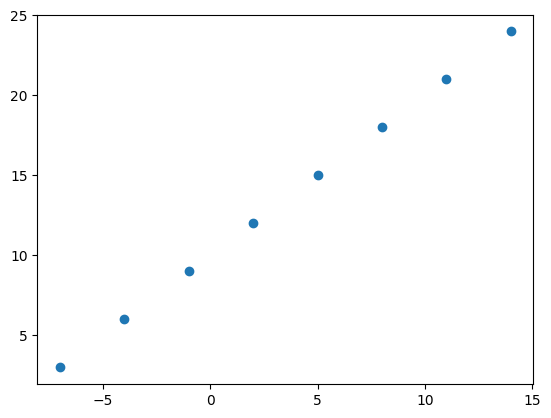

In [2]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

# Input and output shapes

In [3]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([21000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([21000], dtype=int32)>)

In [4]:
X.shape, y.shape

((8,), (8,))

***Turn numpy arrays into tensors***

In [5]:
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
tf.expand_dims(X,axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [7]:
# Set random seed
tf.random.set_seed(42)
# Import Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [8]:
# Create a model using the Sequential API

model = Sequential()
model.add(Dense(180,activation=None,name="input_layer"))
model.add(Dense(1,name="output_layer"))
# Compile the model

model.compile(loss="mae",optimizer=optimizers.Adam(lr=0.01) ,metrics=["mae"])

# Fit the model

model.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

Epoch 1/200
1/1 [==============================] - 6s 6s/step - loss: 13.2313 - mae: 13.2313
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 13.1005 - mae: 13.1005
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 12.9696 - mae: 12.9696
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 12.8386 - mae: 12.8386
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 12.7074 - mae: 12.7074
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 12.5761 - mae: 12.5761
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 12.4446 - mae: 12.4446
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 12.3129 - mae: 12.3129
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 12.1810 - mae: 12.1810
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 12.0489 - mae: 12.0489
Epoch 11/200
1/1 [==============================] - 0

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 180)               360       
                                                                 
 output_layer (Dense)        (None, 1)                 181       
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from tensorflow.keras.models import load_model

model.save('tensor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 81ms/step


array([[28.950048]], dtype=float32)

**Creating new dataset**

In [13]:
X = tf.range(-100,100,4)
y = X+10

In [14]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are test samples (20% of the data)
y_test = y[40:]

# Visualisation of data

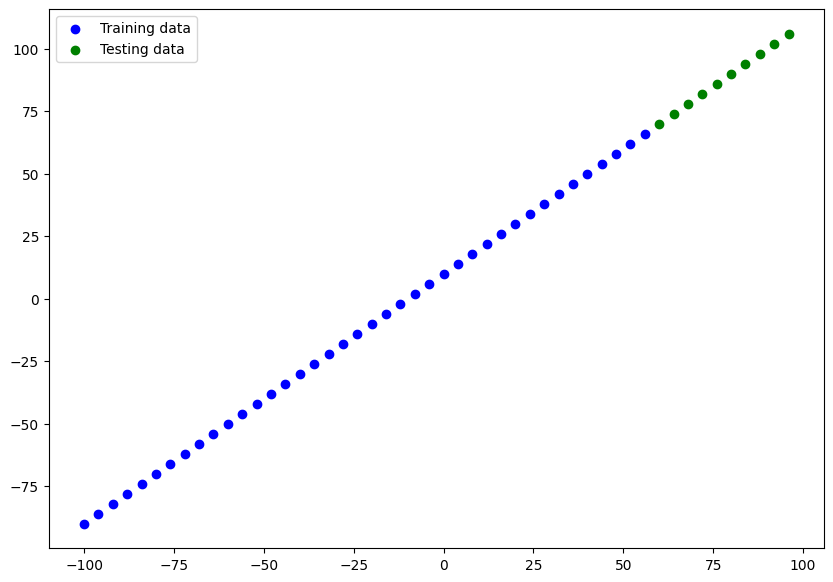

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label="Training data")
plt.scatter(X_test,y_test,c='g',label="Testing data")
plt.legend();

In [16]:
#pip install plot_model

In [17]:
#pip install pydot_ng

In [18]:
#pip install graphviz

In [19]:
#pip install pydot

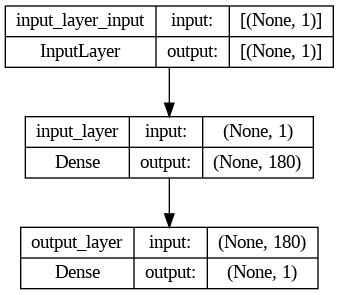

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True,)

# Visualisation of Model Predictions

In [21]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 45ms/step


array([[ 86.26872],
       [ 91.60067],
       [ 96.93264],
       [102.26462],
       [107.59657],
       [112.92856],
       [118.26051],
       [123.59248],
       [128.92445],
       [134.25644]], dtype=float32)

In [22]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Creating a plotting function**

In [23]:
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predict=y_pred):
  """
  Plots training data, test data and compare predcitions to true labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',label="Training data")
  plt.scatter(test_data,test_labels,c='g',label="Testing data")
  plt.scatter(test_data,y_pred,c='r',label="Prediction data")

  plt.legend();

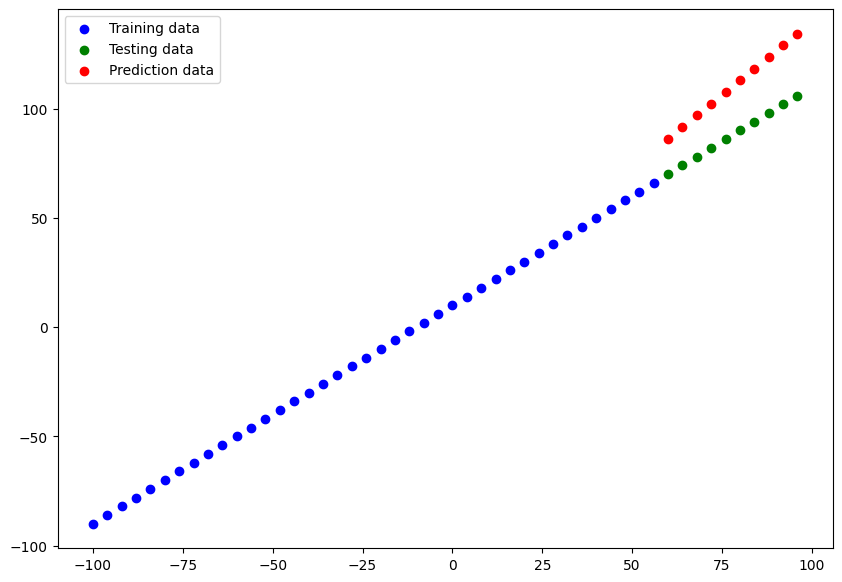

In [24]:
plot_pred()

**Evalutation of model**

In [26]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 127ms/step - loss: 22.2626 - mae: 22.2626


[22.2625675201416, 22.2625675201416]

In [27]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.      , 10.320134, 11.973056, 15.011694, 19.596573, 24.928558,
       30.260513, 35.592484, 40.924454, 46.25644 ], dtype=float32)>

In [28]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 86.26872],
       [ 91.60067],
       [ 96.93264],
       [102.26462],
       [107.59657],
       [112.92856],
       [118.26051],
       [123.59248],
       [128.92445],
       [134.25644]], dtype=float32)>

In [29]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 86.26872,  91.60067,  96.93264, 102.26462, 107.59657, 112.92856,
       118.26051, 123.59248, 128.92445, 134.25644], dtype=float32)>

In [31]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=22.262568>

In [34]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=510.25854>